<center><h1>Processo seletivo Lumini IT - Cientista de Dados </h1></center>
<h3> Bruno Borges de Souza </h3>

<h2> Desafio </h2>
Neste teste, peço a v. que utilize os dados anexos em um exercício de análise exploratória. Trata-se de uma amostra de inscrições no ENEM de 2016. Utilize as tecnologias, processos e métodos que você preferir para criar um caderno de apresentação do conteúdo descoberto que contenha o código utilizado e seja reprodutível.

Além da análise exploratória livre, aborde o seguinte problema:
<ul> 

 <li>Como é possível segmentar os inscritos de forma clara e objetiva com o intuito de justificar investimentos em educação destinados a certas parcelas de alunos?</li>

</ul>

É obrigatório o uso da sua conta Github para realizar o Fork deste repositório e enviar pull-request ao término do desafio, para sabermos se possui conhecimentos básicos de como funciona a ferramenta git.
<ul> 

 <li>Boas técnicas e conhecimentos em DataViz são um diferencial</li>

</ul>
<h2> Análise Exploratória dos Dados </h2>
Para análise exploratória dos dados da base, foi selecionado as variáveis que mais representam a variação média das notas do Enem. Foi feita uma análise avaliando a nota  média por cada categoria das variáveis e também uma análise comparando a representatividade da categoria entre toda a base e base dos 5% melhores alunos. O objetivo  destas análies é justamente avaliar em quais categorias os inscritos tem menor nota média, o que tornaria possível segmentá-los, justificando investimentos nessa parcela em específico. 

In [28]:
#importando as bibliotecas que deverão ser utilizadas
import pandas as pd #manipulação de dados 
import numpy as np #manipulação de arrays
import matplotlib.pyplot as plt #visualização
import seaborn as sns #viualozação
from sklearn.ensemble import RandomForestRegressor #Random Forest para detectar importância de features
from sklearn.preprocessing import LabelEncoder #codifocação de dados categóricos em dados inteiros


<h3> Selecionando as variáveis e preparação dos dados </h3>
Para análise, selecionamos o estado, sexo, etnia, escola, escolaridade dos pais e notas por disciplina

In [29]:
colunas = ['SG_UF_RESIDENCIA','TP_SEXO','TP_COR_RACA','TP_ESCOLA','Q001','Q002', 'Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
          'NU_NOTA_MT', 'NU_NOTA_REDACAO']
base = pd.read_csv('Microdados_Enem_2016.csv', encoding='latin-1', 
                 sep=',', usecols=colunas)

Deletamos todas inscritos com valores nulos. Provavelmente são alunos ausentes.

In [30]:
total_null = base.isnull().sum().sort_values(ascending = False)
base.info()

# Elimina as linhas com nota média NaN
base.dropna(inplace=True)

print(len(base))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 12 columns):
SG_UF_RESIDENCIA    13730 non-null object
TP_SEXO             13730 non-null object
TP_COR_RACA         13730 non-null int64
TP_ESCOLA           13730 non-null int64
NU_NOTA_CN          10341 non-null float64
NU_NOTA_CH          10341 non-null float64
NU_NOTA_LC          10133 non-null float64
NU_NOTA_MT          10133 non-null float64
NU_NOTA_REDACAO     10133 non-null float64
Q001                13730 non-null object
Q002                13730 non-null object
Q006                13730 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.3+ MB
10097


Criaremos uma nova coluna, que deverá conter a nota média das 5 disciplinas.

In [31]:
# Cria nota média
base['NOTA_MEDIA'] = (
    base['NU_NOTA_CN'] + base['NU_NOTA_CH'] + base['NU_NOTA_LC'] + base['NU_NOTA_MT'] + 
    base['NU_NOTA_REDACAO']) / 5.0

<h3> Base dos melhores alunos </h3>
Aqui vamos fazer uma base que selecionará os 5% dos alunos com as maiores notas médias. O objetivo é fazer analise comparativas com a base geral de innscritos. A note de corte para os incristos estarem  na base dos 5% melhores alunos é de 642 pontos.

In [32]:
#nota de corte para os melhores alunos
nota_corte = base.NOTA_MEDIA.nlargest(round(len(base)*0.05)).min()
base_melhores_notas = base[base.NOTA_MEDIA >= nota_corte]
print(base_melhores_notas)

      SG_UF_RESIDENCIA TP_SEXO  TP_COR_RACA  TP_ESCOLA  NU_NOTA_CN  \
60                  PR       F            1          1       596.2   
96                  SP       M            1          1       591.8   
135                 MG       F            1          3       635.8   
149                 DF       F            1          1       653.2   
197                 RS       F            1          1       619.3   
...                ...     ...          ...        ...         ...   
13683               BA       M            1          1       607.8   
13692               SP       F            1          1       638.7   
13710               BA       F            3          1       603.5   
13712               ES       F            1          1       722.1   
13714               RJ       M            3          3       660.0   

       NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002 Q006  \
60          610.4       562.7       728.3            780.0    G    F    I   
96   

<h3> Média das notas por disciplina </h3>

Analisando a média  das notas em cada disicplina da prova, vemos que na base geral, os inscritos perfomam melhor nas disciplinas de humanas (Ciências Humanas, Linguagens e Redação). O cenário é diferente quando avaliamos os incristos com as melhores notas, com boa perfomence em matemática (atrás apenas de Redação). Esse resultado demonstra que os melhores alunos se preparam melhor para a matéria de matemática, matéria que possui a pior nota na avaliação geral.

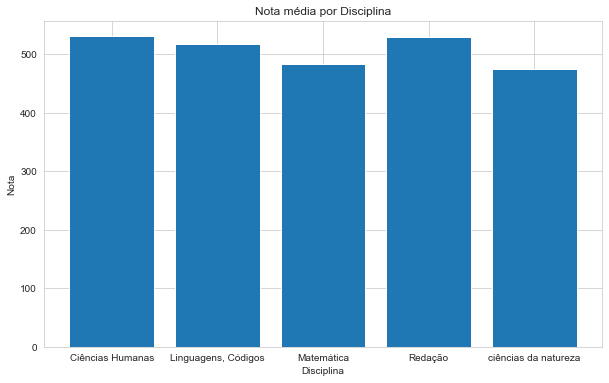

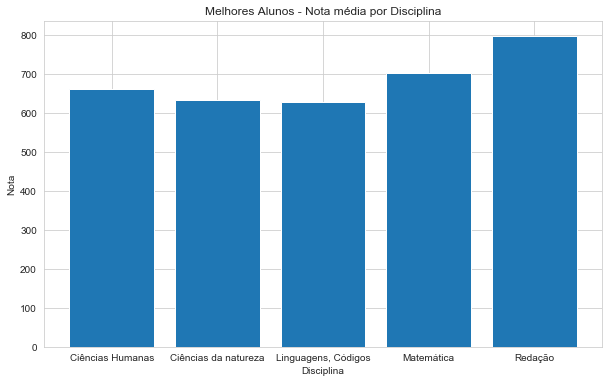

In [33]:
notas_medias={'ciências da natureza':np.mean(base['NU_NOTA_CN']),
                                               'Ciências Humanas':np.mean(base['NU_NOTA_CH']),
                                               'Linguagens, Códigos':np.mean(base['NU_NOTA_LC']),
                                               'Matemática':np.mean(base['NU_NOTA_MT']),
                                               'Redação':np.mean(base['NU_NOTA_REDACAO'])}
lists = sorted(notas_medias.items()) 

x1, y1 = zip(*lists) 
plt.figure(figsize=(10,6))

plt.bar(x1, y1)
plt.title('Nota média por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.show()

notas_medias_melhores = {'Ciências da natureza':np.mean(base_melhores_notas['NU_NOTA_CN']),
                                               'Ciências Humanas':np.mean(base_melhores_notas['NU_NOTA_CH']),
                                               'Linguagens, Códigos':np.mean(base_melhores_notas['NU_NOTA_LC']),
                                               'Matemática':np.mean(base_melhores_notas['NU_NOTA_MT']),
                                               'Redação':np.mean(base_melhores_notas['NU_NOTA_REDACAO'])}

lists = sorted(notas_medias_melhores.items())

x2, y2 = zip(*lists)
plt.figure(figsize=(10,6))

plt.bar(x2, y2)
plt.title('Melhores Alunos - Nota média por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.show()


Pelo histograma, a média das notas é próxima de 500, variando entre aproximadamente 300 e 800 pontos (com exceção dos outliers).

Text(0.5, 0, 'Nota Média')

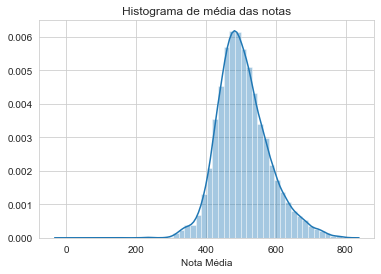

In [34]:
# Histograma das médias

plt.axes(sns.distplot(base.NOTA_MEDIA))
plt.title('Histograma de média das notas')
plt.xlabel('Nota Média')


<h3> Média das notas por Estado </h3>

Analisando os gráficos de barra abaixo, podemos notar que São paulo, Ceará, Minas Gerais e Bahia possuem o maior número de inscritos. Entre os melhores alunos, vamos uma grande parcela deles nos estados de São Paulo, Minas Gerais e Rio de Janeiro (lugares que concentram as melhores escolas do país). Analisando a nota média por estado, podemos notar que todos os estado da região Sul e Sudeste atingiram a média de 500 pontos, ao contrário das regiões Norte e Nordeste, onde apenas os estados de Roraima, Sergipe, Goiás e Pernabumco alcançaram a média. Tal análise sugere que boa parcela dos investimentos sejam direcionados para os estados dessa região. 

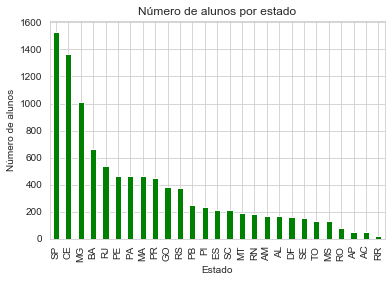

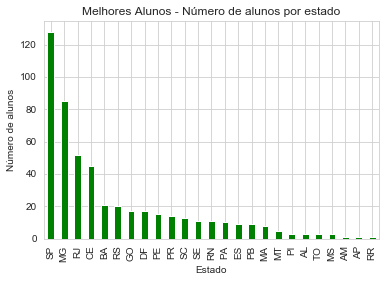

In [35]:
#numero de alunos por estado
base.SG_UF_RESIDENCIA.value_counts().plot.bar(color='green')
plt.title('Número de alunos por estado')
plt.xlabel('Estado')
plt.ylabel('Número de alunos')
plt.show()

 #Melhores alunos - numero de alunos por estado
base_melhores_notas.SG_UF_RESIDENCIA.value_counts().plot.bar(color='green')
plt.title('Melhores Alunos - Número de alunos por estado')
plt.xlabel('Estado')
plt.ylabel('Número de alunos')
plt.show()

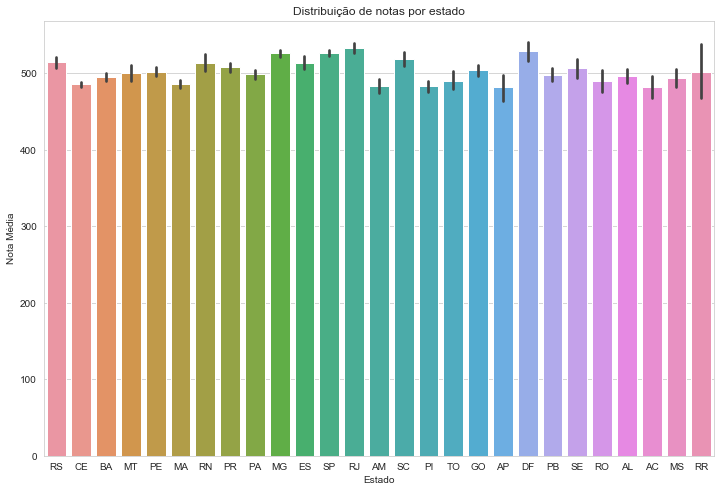

In [36]:
plt.figure(figsize=(12,8))

sns.barplot(
    x="SG_UF_RESIDENCIA",
    y="NOTA_MEDIA",
    data=base, 
    )
plt.title("Distribuição de notas por estado")
plt.xlabel('Estado')
plt.ylabel('Nota Média')
plt.show()



<h3> Nota média por Etnia </h3>
Notamos que os pardos representam o grupo étnico com a maior parcela de inscritos. Mas tal representatividade não é refletida quando analisamos a base com os melhores alunos, onde a parcela de maior representatividade é branca. 

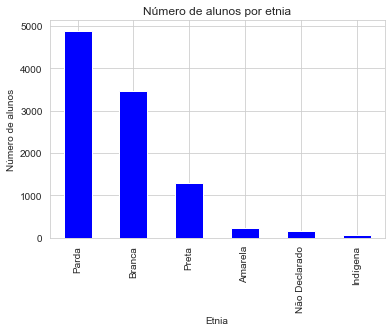

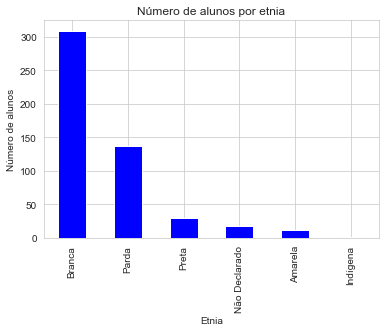

In [37]:
#numero por etnia
base_TP_COR_RACA = pd.Series(base.TP_COR_RACA, dtype='category').cat.rename_categories({3:'Parda', 2:'Preta', 1:'Branca', 0:'Não Declarado', 4:'Amarela', 5:'Indígena', 6:'Não dispor'})
base_TP_COR_RACA.value_counts().plot.bar(color='blue')
plt.title('Número de alunos por etnia')
plt.xlabel('Etnia')
plt.ylabel('Número de alunos')
plt.show()

#Melhores alunos - numero por etnia
base_TP_COR_RACA_m = pd.Series(base_melhores_notas.TP_COR_RACA, dtype='category').cat.rename_categories({3:'Parda', 2:'Preta', 1:'Branca', 0:'Não Declarado', 4:'Amarela', 5:'Indígena', 6:'Não dispor'})
base_TP_COR_RACA_m.value_counts().plot.bar(color='blue')
plt.title('Número de alunos por etnia')
plt.xlabel('Etnia')
plt.ylabel('Número de alunos')
plt.show()

Adicionalmente, os inscritos que se auto-denominam branco também possuem uma nota média melhor, contrastando com as parcelas parda e preta, com as piores notas médias. A justificativa é que as etnias parda e preta são na maior parte pertencentes à classe social baixa, que impacta diretamente no investimento em educação dessa parcela da população. 


Text(0, 0.5, 'Nota Média')

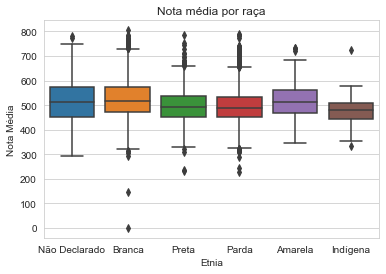

In [38]:
#notas por Etnia
base['TP_COR_RACA_c'] = base_TP_COR_RACA
sns.boxplot(x = 'TP_COR_RACA_c', y = 'NOTA_MEDIA', data = base)
plt.title("Nota média por raça")
plt.xlabel('Etnia')
plt.ylabel('Nota Média')

<h3> Nota média por nível de renda </h3>
Nos gráficos de barras abaixo, a renda foi segmentado em letras de A a Q, que segmentam da menor renda (grupo A) até a maior (grupo Q). A maior parcela dos inscritos são representadas pelas classes B, C e D (renda até 1760 reais). Com relação à base dos melhores alunos, nota-se que há boa representatividade dos grupo da grupos C, H, J (pertencentes à classe média baixa e alta). Isso ocorre devida a esse grupos terem maior representatividade na base geral e possuirem muitos alunos perfomando muito acima da média (outliers). 


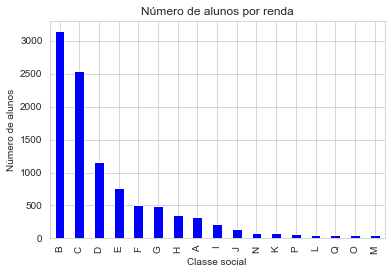

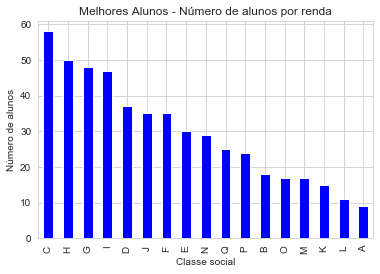

In [39]:
 # distribuição do número de alunos por nível de renda
base.Q006.value_counts().plot.bar(color='blue')
sns.set_style("whitegrid") 
plt.title('Número de alunos por renda')
plt.xlabel('Classe social')
plt.ylabel('Número de alunos')
plt.show()

 # Melhores alunos - distribuição do número de alunos por nível de renda
base_melhores_notas.Q006.value_counts().plot.bar(color='blue')
sns.set_style("whitegrid") 
plt.title('Melhores Alunos - Número de alunos por renda')
plt.xlabel('Classe social')
plt.ylabel('Número de alunos')
plt.show()

A partir da análise do Boxplot abaixo, podemos verificar como a nota média cresce linearmente ao aumento da renda da família dos inscritos. Também podemos notar a grande quantidade de outliers superiores nos nívieis mais baixo de renda (pontos acima da linha dos boxplots). A razão disso é o aumento de oportunidades para jovens talentos de baixa renda, a partir de competições em olimpíadas do conhecimento e acesso a escolas públicas de qualidade (geralmente militares e federais). Apesar disso, deve-se buscar altos investimentos públicos em parcelas da população de classe baixa e média, com o objetivo não só de balancear a média das notas por classe social, como também reduzir a desigualdade social a partir do acesso mais amplo ao ensino superior.   

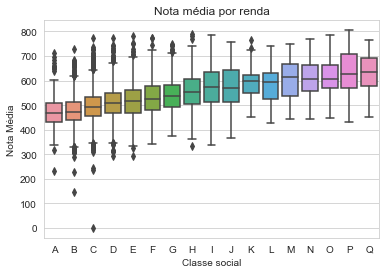

In [40]:
#nota média por renda
import string
sns.set_style("whitegrid") 
sns.boxplot(x = 'Q006', y = 'NOTA_MEDIA', data = base,
           order=list(string.ascii_uppercase[:17]))
plt.title('Nota média por renda')
plt.xlabel('Classe social')
plt.ylabel('Nota Média')
plt.show()


<h3> Média das notas por gênero </h3>
O número de inscritos do gênero feminino é maior na base geral e na base dos melhores alunos. No entanto, na análise da nota média por sexo, não há nenhuma evidência significativa para uma falta de investimento na educação em nenhum dos dois gêneros.

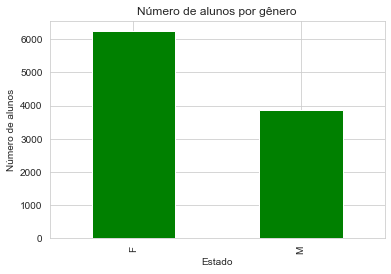

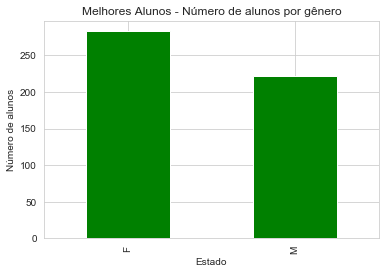

In [41]:
 #numero de alunos por sexo
base.TP_SEXO.value_counts().plot.bar(color='green')
plt.title('Número de alunos por gênero')
plt.xlabel('Estado')
plt.ylabel('Número de alunos')
plt.show()

 #Melhores alunos - numero de alunos por sexo
base_melhores_notas.TP_SEXO.value_counts().plot.bar(color='green')
plt.title('Melhores Alunos - Número de alunos por gênero')
plt.xlabel('Estado')
plt.ylabel('Número de alunos')
plt.show()

Text(0, 0.5, 'Nota Média')

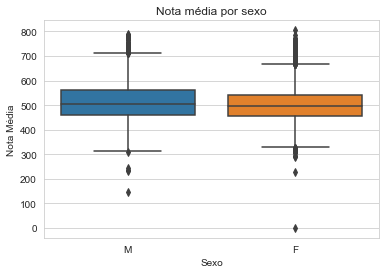

In [42]:
#notas por sexo
sns.boxplot(x = 'TP_SEXO', y = 'NOTA_MEDIA', data = base)
plt.title("Nota média por sexo")
plt.xlabel('Sexo')
plt.ylabel('Nota Média')

Comparando os gráficos abaixo, notamos que, em geral, a média da nota em matemática é maior entre os homens que as mulheres. Em redação, o inverso ocorre, onde mulheres costumam ter uma nota maior. Devido a esses resultados, pode ser importanta que professores de matemática e língua portuguesa incentivem mulheres e homens na diciplina em que atua, respectivamente. Esse incentivo pode incrementar o resultado médio final em tais matérias.

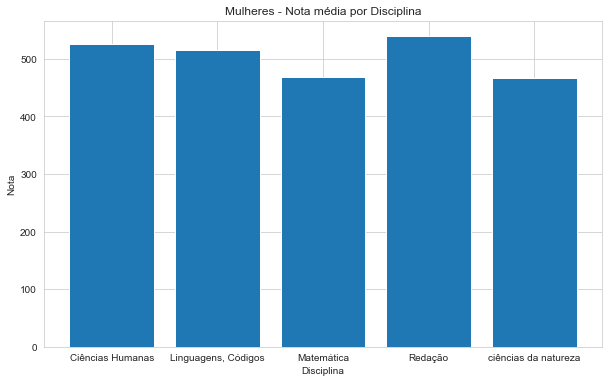

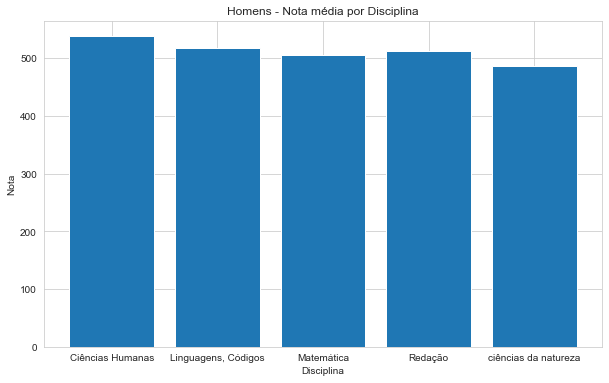

In [43]:
base_mulher = base.where(base['TP_SEXO'] == 'F')
base_homem = base.where(base['TP_SEXO'] == 'M')
notas_medias_mulheres = {'ciências da natureza':np.mean(base_mulher['NU_NOTA_CN']),
                                               'Ciências Humanas':np.mean(base_mulher['NU_NOTA_CH']),
                                               'Linguagens, Códigos':np.mean(base_mulher['NU_NOTA_LC']),
                                               'Matemática':np.mean(base_mulher['NU_NOTA_MT']),
                                               'Redação':np.mean(base_mulher['NU_NOTA_REDACAO'])}

lists = sorted(notas_medias_mulheres.items()) 

x1, y1 = zip(*lists) 
plt.figure(figsize=(10,6))

plt.bar(x1, y1)
plt.title('Mulheres - Nota média por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.show()


notas_medias_homens = {'ciências da natureza':np.mean(base_homem['NU_NOTA_CN']),
                                               'Ciências Humanas':np.mean(base_homem['NU_NOTA_CH']),
                                               'Linguagens, Códigos':np.mean(base_homem['NU_NOTA_LC']),
                                               'Matemática':np.mean(base_homem['NU_NOTA_MT']),
                                               'Redação':np.mean(base_homem['NU_NOTA_REDACAO'])}

lists = sorted(notas_medias_homens.items()) 

x1, y1 = zip(*lists) 
plt.figure(figsize=(10,6))

plt.bar(x1, y1)
plt.title('Homens - Nota média por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.show()

<h3> Importância das variáveis na nota média dos incritos </h3>
Por fim, analisaremos o quanto as variáveis (features) da base de dados dos inscritos no ENEM impactam na nota média final. O método utilizado é o algoritmo de machine learning  random forest, um algoritmo bastante popular, que usa um ensemble de árvores de decisão para fazer a predição. O objetivo é encontrar as variáveis que mais impactam na variável preditora (a nota média). As variáveis selecionadas são:
<ul>

 <li><b>Q006</b> (renda da família) </li>
 <li><b>SG_UF_RESIDENCIA </b>(estado do inscrito) </li>
 <li><b>TP_SEXO</b> (gênero) </li>
 <li><b>Q002 </b> (escolaridade da mãe) </li>
 <li><b>Q001</b> (escolaridade do pai) </li>
 <li><b>TP_COR_RACA</b> (etnia) </li>
 <li><b>TP_ESCOLA</b> (Tipo de escola do inscrito) </li>
</ul>


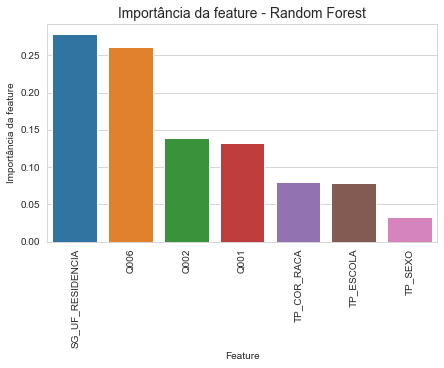

In [44]:
#random forest com 1600 árvores.
rfr = RandomForestRegressor(n_estimators = 1600,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 100,
 bootstrap = False)
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
base2 = base
base2['SG_UF_RESIDENCIA'] = LE.fit_transform(base2['SG_UF_RESIDENCIA'])
base2['TP_SEXO'] = LE.fit_transform(base2['TP_SEXO'])
base2['Q001'] = LE.fit_transform(base2['Q001'])
base2['Q002'] = LE.fit_transform(base2['Q002'])
base2['Q006'] = LE.fit_transform(base2['Q006'])
rfr.fit(base2.drop(columns=['NOTA_MEDIA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
          'NU_NOTA_MT', 'NU_NOTA_REDACAO','TP_COR_RACA_c']),base2.NOTA_MEDIA)

features = ['SG_UF_RESIDENCIA','TP_SEXO','TP_COR_RACA','TP_ESCOLA','Q001','Q002', 'Q006']
tmp = pd.DataFrame({'Feature': features, 'Importância da feature': rfr.feature_importances_})
tmp = tmp.sort_values(by='Importância da feature',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Importância da feature - Random Forest',fontsize=14)
s = sns.barplot(x='Feature',y='Importância da feature',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

<h3> Conclusão </h3>
A partir da análise do gráfico de barras abaixo, notamos que a renda da família é um fator que impacta muito na nota final. Notamos também que o estado de origem do inscrito também influenccia diretamente no resultado. O grau de escolaridade dos pais também é um fator que pode determinar a nota média do inscrito. Podemos concluir a partir dessa e das outras análises anteriores, que o investimento na educação principalmente em famílias menos favorecidas e em estados no Norte e Nordeste (estados que também possuem um IDH menor que a média nacional, além de ter a maior concentração de pardos, pretos e indígenas no país), deve ser prioridade no gastos de investimentos em educação no Brasil.  
